In [1]:
from sklearn.datasets import load_digits
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
digit = load_digits()
x = digit.data
y = digit.target

In [3]:
x.shape , y.shape

((1797, 64), (1797,))

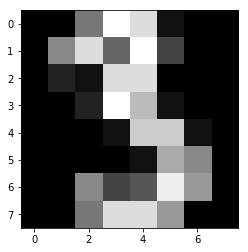

In [4]:
plt.imshow(x[3].reshape(8,8),cmap= plt.cm.gray)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25,random_state = 0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [7]:
from sklearn.linear_model import LogisticRegression
LogisticRegr = LogisticRegression()
LogisticRegr.fit(X_train , Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
predictions = LogisticRegr.predict(X_test)

In [9]:
score =  LogisticRegr.score(X_test,Y_test)
print(score)

0.9533333333333334


In [10]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,predictions)
print(matrix)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


In [11]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [12]:
from sklearn import model_selection

In [13]:
kfold = model_selection.KFold(n_splits=10,random_state=7)

In [14]:
results = model_selection.cross_val_score(LogisticRegr,x,y,cv=kfold,scoring = 'r2')
results

array([0.73184699, 0.86942354, 0.81023661, 0.79423609, 0.82434177,
       0.94343263, 0.92524112, 0.90725247, 0.60169024, 0.82555495])

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv ")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df1 = df.drop(['date'], axis =1)
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df2 = (df1-df1.min())/(df1.max()-df1.min())
df2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


In [18]:
df_n= df2.select_dtypes(include = [np.number])
df_l = df_n.loc[:,['sqft_living','price']]
df_l.head()

,sqft_living,price
0,0.067170,0.019266
1,0.172075,0.060721
2,0.036226,0.013770
3,0.126038,0.069377
4,0.104906,0.057049


In [19]:
x = np.array(df_l['sqft_living']).reshape(21613,1)
y = np.array(df_l['price']).reshape(21613,1)
x.shape
y.shape

(21613, 1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(15129, 1) (15129, 1)
(6484, 1) (6484, 1)


In [22]:
reg = LinearRegression()
reg.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
reg.coef_

array([[0.4918813]])

In [24]:
reg.intercept_

array([-0.00536691])

In [25]:
Y_pred = reg.predict(X_test)

In [26]:
Y_pred

array([[0.04215068],
       [0.12196538],
       [0.1472091 ],
       ...,
       [0.0544013 ],
       [0.09375181],
       [0.05774238]])

In [27]:
a = pd.DataFrame({"actual":list(Y_test), "prediction":list(Y_pred)})
a.head()

,actual,prediction
0,[0.07672131147540984],[0.0421506756580689]
1,[0.12786885245901639],[0.12196537684168474]
2,[0.14098360655737704],[0.1472090962858051]
3,[0.04416432786885246],[0.047347912014211326]
4,[0.09180327868852459],[0.060712234072863275]


In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(metrics.mean_absolute_error(Y_test,Y_pred))

0.02287088974636404


In [29]:
print(metrics.mean_squared_error(Y_test,Y_pred))

0.0011581430971350857


In [30]:
print(np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))

0.15123124593272397
